# DeepMost Agentic SDR - Exploratory Data Analysis

This notebook provides a template for analyzing sales simulation data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Paths
DATA_DIR = Path('../data/processed')
CONVERSATIONS_DIR = Path('../data/raw/conversations')

## 1. Load Data

In [2]:
# Load main datasets
master_df = pd.read_csv(DATA_DIR / 'simulations_master.csv')
turns_df = pd.read_csv(DATA_DIR / 'conversation_turns.csv')
metrics_df = pd.read_csv(DATA_DIR / 'simulation_metrics.csv')

print(f"Master Records: {len(master_df)}")
print(f"Conversation Turns: {len(turns_df)}")
print(f"Metrics Records: {len(metrics_df)}")

Master Records: 17
Conversation Turns: 115
Metrics Records: 17


In [3]:
# Preview data
master_df.head()

,simulation_id,timestamp,target_url,company_context_length,num_turns,total_seller_words,total_buyer_words,avg_seller_turn_length,avg_buyer_turn_length,score,outcome,key_objection,feedback,conversation_file
0,95ad97c9-57ab-4b61-9b4a-dc6d03b938dd,2026-02-08T13:04:30.400820,https://openai.com,41,2,222,90,74.00,45.00,3,Pending,Unknown,Auto-generated from batch pipeline. Sentiment:...,95ad97c9-57ab-4b61-9b4a-dc6d03b938dd.json
1,43290c94-50b8-418e-b69a-fe7a0f601def,2026-02-08T13:04:57.026424,https://deepmostai.com,1510,3,254,174,63.50,58.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,43290c94-50b8-418e-b69a-fe7a0f601def.json
2,752c57c7-3f4b-4f17-860e-174c717bb689,2026-02-08T13:05:17.121356,https://stripe.com,3000,3,282,159,94.00,53.00,5,Success,Unknown,Auto-generated from batch pipeline. Sentiment:...,752c57c7-3f4b-4f17-860e-174c717bb689.json
3,968daf59-917c-4a45-a46f-6eee2b9edd86,2026-02-08T13:05:36.891932,https://www.ibm.com,3000,3,287,169,95.67,56.33,3,Pending,Unknown,Auto-generated from batch pipeline. Sentiment:...,968daf59-917c-4a45-a46f-6eee2b9edd86.json
4,c7efa28d-4f2a-4a00-ac29-3d570b602488,2026-02-08T23:18:43.442043,https://www.salesforce.com/in/,3000,4,181,140,45.25,35.00,0,Error,Unknown,NaN,c7efa28d-4f2a-4a00-ac29-3d570b602488.json


In [4]:
# Data types and info
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   simulation_id           17 non-null     object 
 1   timestamp               17 non-null     object 
 2   target_url              17 non-null     object 
 3   company_context_length  17 non-null     int64  
 4   num_turns               17 non-null     int64  
 5   total_seller_words      17 non-null     int64  
 6   total_buyer_words       17 non-null     int64  
 7   avg_seller_turn_length  17 non-null     float64
 8   avg_buyer_turn_length   17 non-null     float64
 9   score                   17 non-null     int64  
 10  outcome                 17 non-null     object 
 11  key_objection           17 non-null     object 
 12  feedback                16 non-null     object 
 13  conversation_file       17 non-null     object 
dtypes: float64(2), int64(5), object(7)
memory us

## 2. Basic Statistics

In [5]:
# Descriptive statistics
metrics_df.describe()

,context_length,num_turns,seller_total_words,buyer_total_words,seller_avg_words_per_turn,buyer_avg_words_per_turn,seller_max_words,buyer_max_words,seller_min_words,buyer_min_words,word_ratio_seller_buyer,total_conversation_length,score,outcome_binary
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2606.647059,3.117647,277.235294,150.647059,76.926471,48.715294,99.176471,56.235294,50.352941,40.235294,1.875294,427.882353,3.411765,0.176471
std,913.580657,0.485071,62.706189,27.149911,17.129139,8.060235,21.398701,7.241628,17.603058,14.064714,0.450210,75.928323,1.769845,0.392953
min,41.000000,2.000000,163.000000,90.000000,40.750000,35.000000,51.000000,48.000000,19.000000,0.000000,1.090000,312.000000,0.000000,0.000000
25%,3000.000000,3.000000,252.000000,136.000000,73.500000,44.670000,98.000000,50.000000,43.000000,33.000000,1.560000,388.000000,3.000000,0.000000
50%,3000.000000,3.000000,282.000000,151.000000,82.000000,49.250000,104.000000,55.000000,49.000000,45.000000,1.850000,441.000000,3.000000,0.000000
75%,3000.000000,3.000000,323.000000,165.000000,86.000000,54.000000,110.000000,60.000000,62.000000,47.000000,2.190000,473.000000,3.000000,0.000000
max,3000.000000,4.000000,403.000000,198.000000,100.750000,66.000000,132.000000,74.000000,75.000000,61.000000,2.670000,554.000000,9.000000,1.000000


In [6]:
# Outcome distribution
print("Outcome Distribution:")
print(metrics_df['outcome_label'].value_counts())
print(f"\nSuccess Rate: {metrics_df['outcome_binary'].mean()*100:.1f}%")

Outcome Distribution:
outcome_label
Pending    13
Success     3
Error       1
Name: count, dtype: int64

Success Rate: 17.6%


## 3. Visualizations

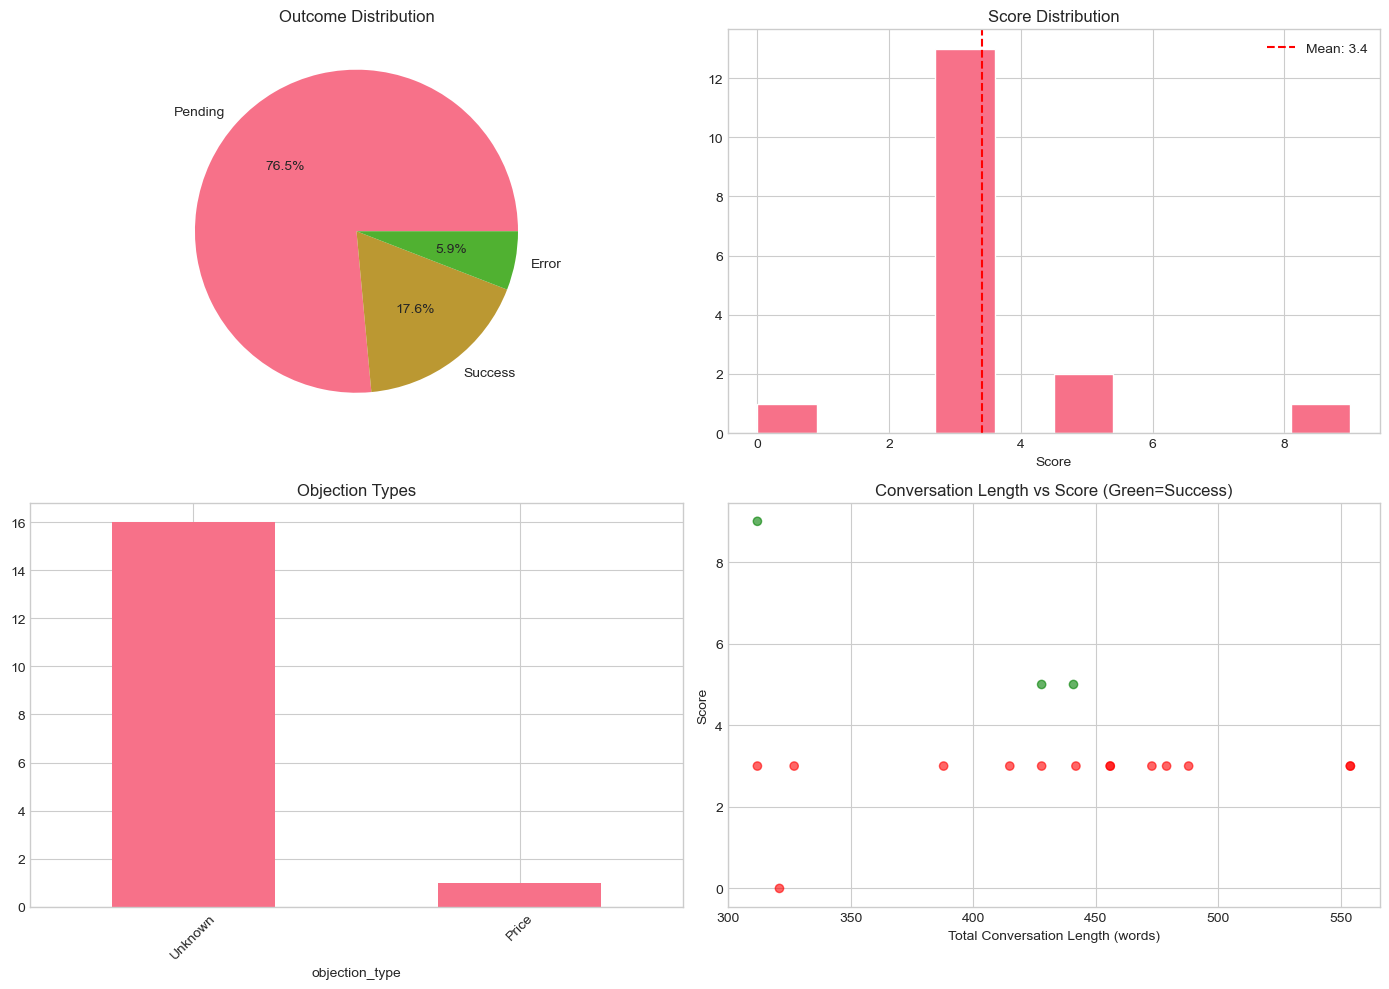

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Outcome Pie Chart
metrics_df['outcome_label'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Outcome Distribution')
axes[0,0].set_ylabel('')

# 2. Score Distribution
metrics_df['score'].hist(ax=axes[0,1], bins=10, edgecolor='white')
axes[0,1].axvline(metrics_df['score'].mean(), color='red', linestyle='--', label=f'Mean: {metrics_df["score"].mean():.1f}')
axes[0,1].set_title('Score Distribution')
axes[0,1].set_xlabel('Score')
axes[0,1].legend()

# 3. Objection Types
metrics_df['objection_type'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Objection Types')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Conversation Length vs Score
colors = ['green' if x == 1 else 'red' for x in metrics_df['outcome_binary']]
axes[1,1].scatter(metrics_df['total_conversation_length'], metrics_df['score'], c=colors, alpha=0.6)
axes[1,1].set_xlabel('Total Conversation Length (words)')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Conversation Length vs Score (Green=Success)')

plt.tight_layout()
plt.savefig('../data/processed/eda_overview.png', dpi=150)
plt.show()

## 4. Turn-Level Analysis

In [8]:
# Average message length by speaker
print("Average Word Count by Speaker:")
print(turns_df.groupby('speaker')['word_count'].mean())

Average Word Count by Speaker:
speaker
Buyer     48.320755
Seller    76.016129
Name: word_count, dtype: float64


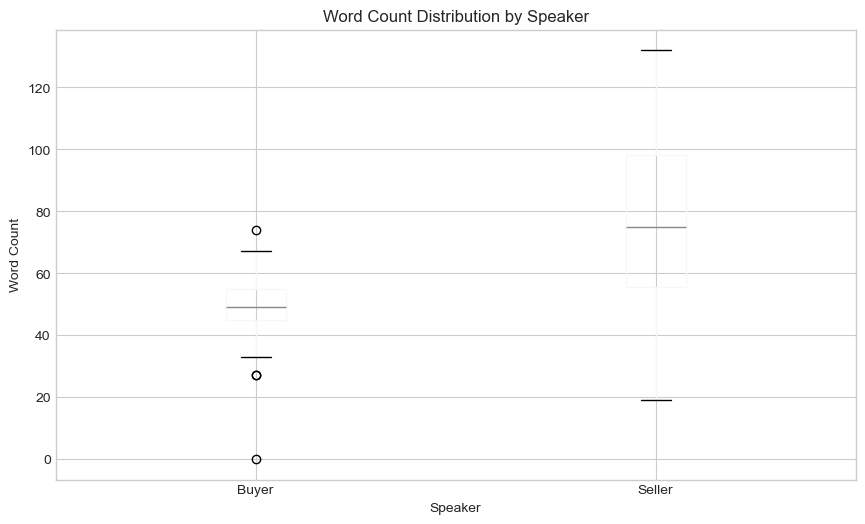

In [9]:
# Word count distribution by speaker
fig, ax = plt.subplots(figsize=(10, 6))
turns_df.boxplot(column='word_count', by='speaker', ax=ax)
ax.set_title('Word Count Distribution by Speaker')
ax.set_xlabel('Speaker')
ax.set_ylabel('Word Count')
plt.suptitle('')
plt.show()

## 5. Correlation Analysis

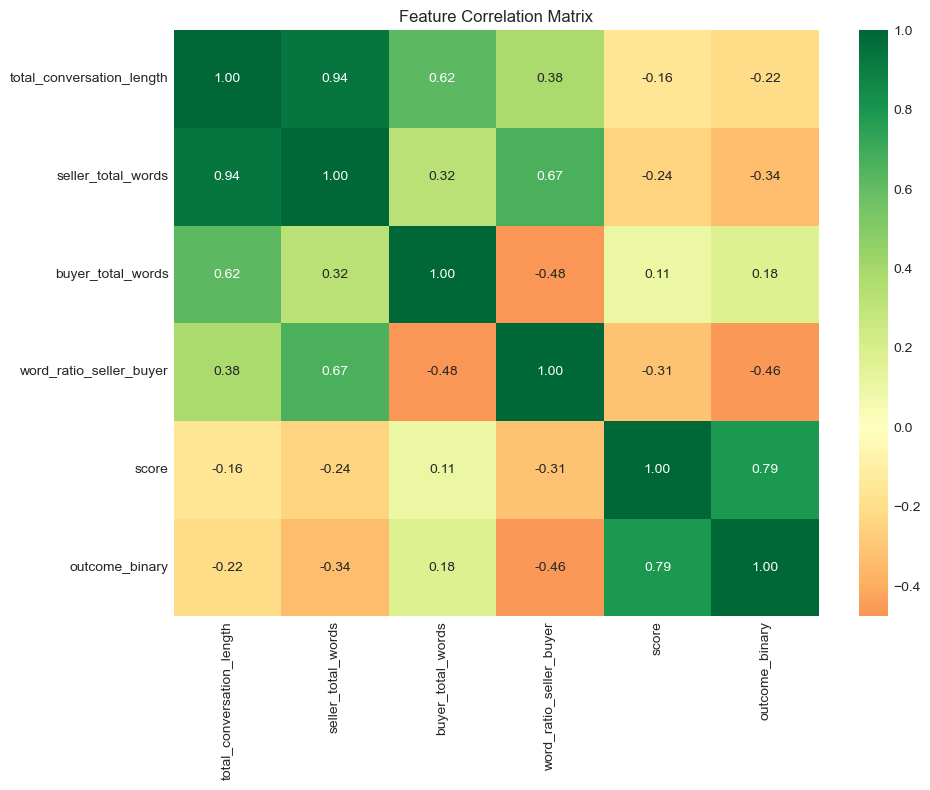

In [10]:
# Feature correlations
numeric_cols = ['total_conversation_length', 'seller_total_words', 'buyer_total_words', 
                'word_ratio_seller_buyer', 'score', 'outcome_binary']

corr_matrix = metrics_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../data/processed/correlation_matrix.png', dpi=150)
plt.show()

## 6. Success Factor Analysis

In [11]:
# Compare metrics between successful and failed calls
comparison = metrics_df.groupby('outcome_binary').agg({
    'total_conversation_length': 'mean',
    'word_ratio_seller_buyer': 'mean',
    'seller_avg_words_per_turn': 'mean',
    'buyer_avg_words_per_turn': 'mean',
    'score': 'mean'
}).rename(index={0: 'Failed', 1: 'Success'})

print("\nMetrics Comparison: Success vs Failed")
comparison.round(2)


Metrics Comparison: Success vs Failed


,total_conversation_length,word_ratio_seller_buyer,seller_avg_words_per_turn,buyer_avg_words_per_turn,score
outcome_binary,,,,,
Failed,435.21,1.97,79.25,48.56,2.79
Success,393.67,1.44,66.08,49.42,6.33


## 7. Load Individual Conversation (Example)

In [12]:
# Load a sample conversation
json_files = list(CONVERSATIONS_DIR.glob('*.json'))
if json_files:
    with open(json_files[0]) as f:
        sample_conv = json.load(f)
    
    print(f"Simulation ID: {sample_conv['simulation_id'][:8]}...")
    print(f"Target URL: {sample_conv['target_url']}")
    print(f"\nConversation:")
    for turn in sample_conv['conversation']:
        print(f"  [{turn['speaker']}]: {turn['message'][:100]}...")
else:
    print("No conversation files found. Run some simulations first!")

Simulation ID: 10a7a6fa...
Target URL: https://asana.com

Conversation:
  [Seller]: Hi [CTO Name], this is [SDR Name] calling from DeepData AI. I hope you're having a productive week. ...
  [Buyer]: [CTO Name]: [SDR Name], thanks for calling. Look, I'm pretty swamped today. What exactly is it you'r...
  [Seller]: I understand you're busy, [CTO Name]. My goal is just a quick five-minute conversation to see if the...
  [Buyer]: [CTO Name]: "Streamline data processing" and "unlock insights" – those are pretty generic. We have o...
  [Seller]: That's a fair question, [CTO Name]. While Asana is excellent for visualizing and managing the *execu...
  [Buyer]: [CTO Name]: So, you're saying you can analyze raw data *faster* or *better* than what we can build o...
  [Seller]: That’s a great point about existing services. What sets DeepData AI apart is our proprietary AI mode...


## 8. Simple ML Model (Classification)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Check if we have enough data
if len(metrics_df) >= 10:
    # Features
    feature_cols = ['total_conversation_length', 'word_ratio_seller_buyer', 
                    'seller_avg_words_per_turn', 'buyer_avg_words_per_turn',
                    'context_length']
    
    X = metrics_df[feature_cols].fillna(0)
    y = metrics_df['outcome_binary']
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Evaluate
    print(f"Training Accuracy: {model.score(X_train_scaled, y_train):.2f}")
    print(f"Test Accuracy: {model.score(X_test_scaled, y_test):.2f}")
    
    # Feature importance
    importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print(importance)
else:
    print(f"Need at least 10 samples for ML. Currently have {len(metrics_df)}. Run more simulations!")

Training Accuracy: 1.00
Test Accuracy: 0.50

Feature Importance:
                     Feature  Importance
3   buyer_avg_words_per_turn    0.311705
2  seller_avg_words_per_turn    0.303235
1    word_ratio_seller_buyer    0.208963
0  total_conversation_length    0.176097
4             context_length    0.000000


## 9. Export Summary Report

In [14]:
# Generate summary report
report = f"""
# DeepMost Agentic SDR - Analysis Report
Generated: {pd.Timestamp.now()}

## Dataset Overview
- Total Simulations: {len(metrics_df)}
- Total Conversation Turns: {len(turns_df)}
- Success Rate: {metrics_df['outcome_binary'].mean()*100:.1f}%
- Average Score: {metrics_df['score'].mean():.2f}/10

## Key Findings
- Average Conversation Length: {metrics_df['total_conversation_length'].mean():.0f} words
- Seller/Buyer Word Ratio: {metrics_df['word_ratio_seller_buyer'].mean():.2f}
- Most Common Objection: {metrics_df['objection_type'].mode().iloc[0] if len(metrics_df) > 0 else 'N/A'}

## Recommendations
Based on the data analysis:
1. Collect more simulations for robust modeling (target: 100+)
2. Analyze successful calls to identify winning patterns
3. Use turn-level data for dialogue flow analysis
"""

with open('../data/processed/analysis_report.md', 'w') as f:
    f.write(report)

print("Report saved to data/processed/analysis_report.md")
print(report)

Report saved to data/processed/analysis_report.md

# DeepMost Agentic SDR - Analysis Report
Generated: 2026-02-10 12:19:26.967124

## Dataset Overview
- Total Simulations: 17
- Total Conversation Turns: 115
- Success Rate: 17.6%
- Average Score: 3.41/10

## Key Findings
- Average Conversation Length: 428 words
- Seller/Buyer Word Ratio: 1.88
- Most Common Objection: Unknown

## Recommendations
Based on the data analysis:
1. Collect more simulations for robust modeling (target: 100+)
2. Analyze successful calls to identify winning patterns
3. Use turn-level data for dialogue flow analysis

